# MEDimage Tutorial − Initiation to the MEDimage class

@Author : MEDomics consortium

@Email : medomics.info@gmail.com

STATEMENT: This file is part of https://github.com/MEDomics/MEDomicsLab/, a package providing PYTHON programming tools for radiomics analysis. --> Copyright (C) MEDomicsLab consortium.

This package is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This package is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this package. If not, see http://www.gnu.org/licenses/.

# Introduction

This notebook will you show you how to use MEDimage package in order to extract geatures fom medical images, we will use Meningioma cancer scan.

Meningioma is a tumor that arises from the meninges which surround the brain and the spinal cord

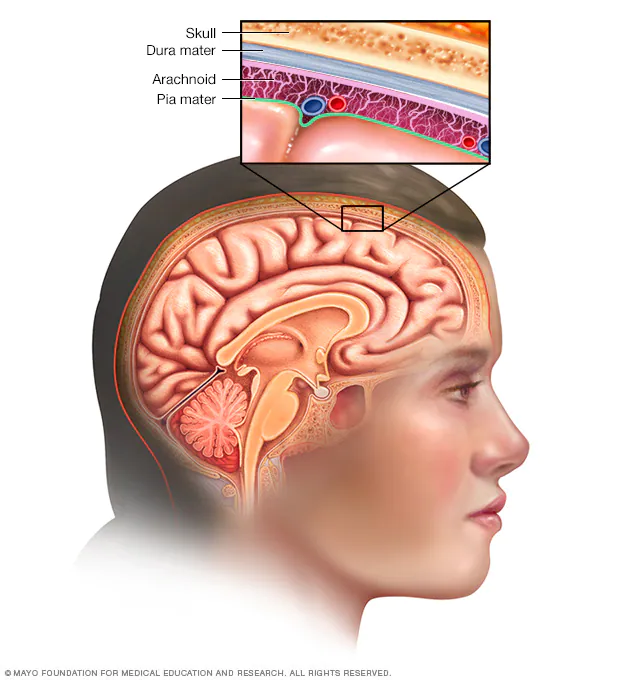



# Dataset - Meningioma MR scan

To begin, we have a file (data) with multiple DICOM in which there are MR file (that contains volume imaging) and RTSTRUC file (mask image). The first thing to is to apply a process on this files in order to have npy files corresponding to each patient; these files are saved in "results". 


In [2]:
import os
import pickle
import sys
from copy import deepcopy
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

MODULE_DIR = os.path.dirname(os.path.abspath('../MEDimage/MEDimage.py'))
sys.path.append(os.path.dirname(MODULE_DIR))

#import MEDimage classes
import numpy as np
from MEDimage.MEDimage import MEDimage
from MEDimage.MEDimageComputeRadiomics import MEDimageComputeRadiomics
from MEDimage.MEDimageProcessing import MEDimageProcessing
from MEDimage.utils import jsonUtils
from MEDimage.utils.processDICOM import processDICOM
from MEDimage.utils.processParams import processParams

In [3]:
def __processParams(imParams, scanType):
    """
    Process the computation settings.
    
    Args:
        imParams (Dict): JSON with the options that will be used during 
            the image processing and features extraction.
        scanType (str): scan type (Ex: MRscan, CTscan...).
        
    Returns:
        A dict with all the settings for the right scan type.
        
    """
    # Find the right parameters for the given scan modality
    if scanType == 'MRscan':
        imParams = imParams['imParamMR']
    elif scanType == 'CTscan':
        imParams = imParams['imParamCT']
    elif scanType == 'PTscan':
        imParams = imParams['imParamPET']
    else:
        raise ValueError(r"scanType must be 'MRscan', 'PTscan' or 'CTscan'")
        
    return imParams

In [4]:
path_dicom_images = Path(os.getcwd()) / "data"  #path to our DICOM files
path_save = Path(os.getcwd()) / "results"

path_images = list(path_dicom_images.rglob('*.dcm'))     #taking only the .dcm files

#Creating the MEDimage class
processDICOM(path_dicom_images, path_save)


--> Scanning all folders in initial directory ... 

100%|███████████████████████████████████| 42169/42169 [00:38<00:00, 1091.78it/s]


DONE
--> Associating all RT objects to imaging volumes


100%|██████████████████████████████████████| 308/308 [00:00<00:00, 69267.86it/s]


DONE
--> Reading all DICOM objects to create MEDimage classes


 12%|█████▏                                    | 38/308 [02:11<19:14,  4.27s/it]

patientID: Meningioma-PMH-B226 error: Invalid DICOM data for dicom_numpy.combine_slices


 20%|████████▌                                 | 63/308 [03:01<05:30,  1.35s/it]

patientID: Meningioma-UCSF-002 error: Invalid DICOM data for dicom_numpy.combine_slices


 38%|███████████████▍                         | 116/308 [06:06<08:37,  2.69s/it]

patientID: Meningioma-PMH-B235 error: Invalid DICOM data for dicom_numpy.combine_slices


 56%|███████████████████████▏                 | 174/308 [08:55<03:58,  1.78s/it]

patientID: Meningioma-UCSF-137 error: Invalid DICOM data for dicom_numpy.combine_slices


 83%|██████████████████████████████████▏      | 257/308 [12:52<01:57,  2.30s/it]

patientID: Meningioma-PMH-B130 error: Invalid DICOM data for dicom_numpy.combine_slices


100%|█████████████████████████████████████████| 308/308 [15:17<00:00,  2.98s/it]

DONE


Now, that our npy files are finally created, we can start the features computation.

We will also need settings for processing and it should be organized in a JSON file. A JSON file is already available in the settings fodler and can the values can be freely changes.

In [5]:
pathSettings = Path(os.getcwd()) / "settings"  #Path to the json file with the setting
imParams = jsonUtils.loadjson(pathSettings / 'Extraction_Meningioma.json') # load settings
imParams = processParams(imParams, scanType='MRscan') # get the right params for our scan type

In this notebook, we will only compute the features for one patient, you will find the information about the patient below:

* **ID**: Meningioma-PMH-B131
* **Imaging scan name**: T1
* **Modality**: MR scan
* **Region of interest**:
   * Number of regions: 1
   * Names of the ROIs: RTV
   * ROI name: {RT}

In [6]:
#Initialization

pathData= Path(os.getcwd()) / "results"   #Path to the npy files for each patient
nameRead = 'Meningioma-PMH-B131__T1CE.MRscan.npy' #scan file scame
nameROI='{RTV}'  #ROI name
roiType = ''
roiType_label = ''

Now that we have all we need to instantiate a *MEDimage* class, we can finish the *MEDimage* initialization and start processing and extraction

In [7]:
from MEDimage.utils.initMEDimage import initMEDimage

MEDimageProcess, MEDimageCR = initMEDimage(nameRead, pathData, roiType, imParams, 'log_file_meningioma_demo.txt')

## Quick features extraction

In [8]:
#Creation of the ROI

from MEDimage.processing.getROI_fromIndexes import getROI_fromIndexes

volObjInit, roiObjInit = getROI_fromIndexes(MEDimageProcess, nameROI=nameROI, boxString='full')

- Local intensity features extraction

In [9]:
from MEDimage.biomarkers.getLocIntFeatures import getLocIntFeatures

LocalIntensity = getLocIntFeatures(
    imgObj=volObjInit.data,
    roiObj=roiObjInit.data,
    res=MEDimageCR.Params['scaleNonText'],
    intensity=MEDimageCR.Params['intensity']
)

LocalIntensity

{'Floc_peak_local': 524.8374, 'Floc_peak_global': []}

- Interpolation

In [10]:
from MEDimage.processing.interpVolume import interpVolume

volObj = deepcopy(volObjInit)
roiObj_Morph = deepcopy(roiObjInit)

# Intensity Mask:
volObj = interpVolume(
    MEDimageCR,
    volObjS=volObjInit,
    voxDim=MEDimageCR.Params['scaleNonText'],
    interpMet=MEDimageCR.Params['volInterp'],
    roundVal=MEDimageCR.Params['glRound'],
    image_type='image',
    roiObjS=roiObjInit,
    boxString=MEDimageCR.Params['boxString']
)
# Morphological Mask:
roiObj_Morph = interpVolume(
    MEDimageCR,
    volObjS=roiObjInit,
    voxDim=MEDimageCR.Params['scaleNonText'],
    interpMet=MEDimageCR.Params['roiInterp'],
    roundVal=MEDimageCR.Params['roiPV'], 
    image_type='roi', 
    roiObjS=roiObjInit,
    boxString=MEDimageCR.Params['boxString']
)


- Re-segmentation (either outlier, range re-segmentation or both)

In [11]:
from MEDimage.processing.rangeReSeg import rangeReSeg

roiObj_Int = deepcopy(roiObj_Morph)
roiObj_Int.data = rangeReSeg(vol=volObj.data, 
                             roi=roiObj_Int.data,
                             im_range=MEDimageCR.Params['im_range'])

- ROI extraction

In [12]:
from MEDimage.processing.roiExtract import roiExtract

volInt_RE = roiExtract(
    vol=volObjInit.data, 
    roi=roiObjInit.data
)

- Statistical features extraction

In [13]:
from MEDimage.biomarkers.getStatsFeatures import getStatsFeatures

Stats = getStatsFeatures(
    vol=volInt_RE,
    intensity=MEDimageCR.Params['intensity']
)

Stats

{'Fstat_mean': 592.0497,
 'Fstat_var': 16174.13,
 'Fstat_skew': -1.098038815699187,
 'Fstat_kurt': 1.6771275710055509,
 'Fstat_median': 621.0,
 'Fstat_min': 24.0,
 'Fstat_P10': 418.0,
 'Fstat_P90': 719.0,
 'Fstat_max': 970.0,
 'Fstat_iqr': 139.5,
 'Fstat_range': 946.0,
 'Fstat_mad': 96.242355,
 'Fstat_rmad': 61.3921,
 'Fstat_medad': 93.000854,
 'Fstat_cov': 0.21480891,
 'Fstat_qcod': 0.11543235415804716,
 'Fstat_energy': 1711374800.0,
 'Fstat_rms': 605.5551}

- Local intensity features extraction

In [14]:
from MEDimage.biomarkers.getLocIntFeatures import getLocIntFeatures

LocalIntensity = getLocIntFeatures(
    imgObj=volObj.data, 
    roiObj=roiObj_Int.data,
    res=MEDimageCR.Params['scaleNonText'],
    intensity=MEDimageCR.Params['intensity']
)
LocalIntensity

{'Floc_peak_local': 602.06805, 'Floc_peak_global': []}

Now, we are done with the features extraction

## Image & Mask cropping - Box creation

In this section we will demonstrate how you can crop the image & the mask and generate a bounding box centered around the ROI with a specific cropping shape. This can be done using the method cropBox() in the processing sub-module. A cropped box serves the same purposes as the full imaging volume.

Visualize imaging data before cropping

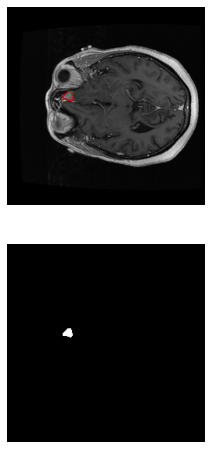

In [15]:
_slice = 70 # index of slice that will be plotted
plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.axis('off')
plt.imshow(volObjInit.data[:, :, _slice], cmap='gray')
plt.contour(roiObjInit.data[:, :, _slice], colors='red', linewidths=0.4, origin='lower', alpha=0.5)
plt.subplot(2, 1, 2)
plt.axis('off')
plt.imshow(roiObjInit.data[:, :, _slice], cmap='gray')
plt.show()

Let's now specify the cropping shape and call the cropping method. You can use computeBoundingBox method in processing module to help you decide the shape of the box.

In [16]:
from MEDimage.processing.cropBox import cropBox

# crop the initial imaging data
crop_shape = [56, 122, 82] # All elements of crop_shape must be an even number (in voxels not mm)
new_image, new_roi = cropBox(volObjInit.data, roiObjInit.data, crop_shape)

Visualize the cropped box

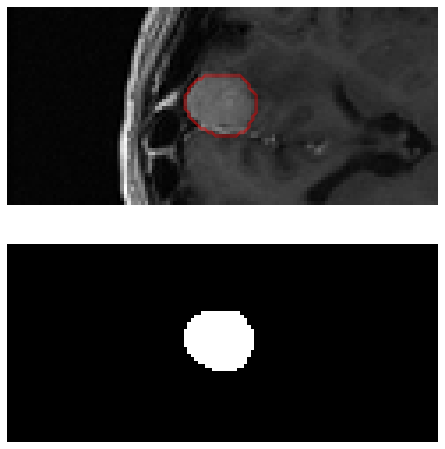

In [17]:
_slice = 44 # index of slice that will be plotted
plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.axis('off')
plt.imshow(new_image[:, :, _slice], cmap='gray')
plt.contour(new_roi[:, :, _slice], colors='red', linewidths=0.4, origin='lower', alpha=0.5)
plt.subplot(2, 1, 2)
plt.axis('off')
plt.imshow(new_roi[:, :, _slice], cmap='gray')
plt.show()

## Features extraction from filtered image

In this section we are going to filter our image (same scan) and use it to extract morphological features.

**PS**: Make sure the JSON settings file contains parameters for the filter you would like to use.

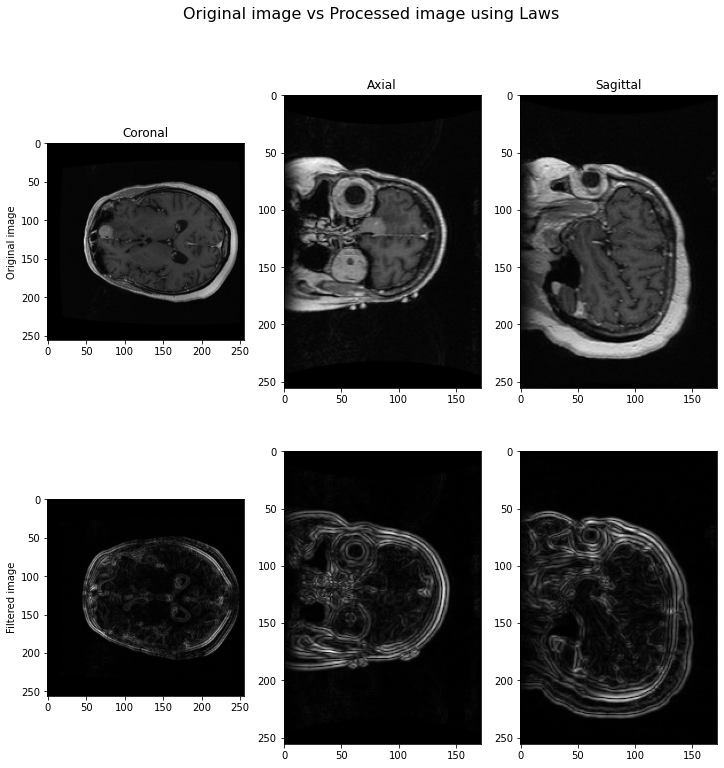

In [18]:
filterName = 'Laws' # make sure JSON setting file contains params for the chosen filter

#Apply the filter on the original volume

VolObjInitOriginal = deepcopy(volObjInit)
VolObjInitFiltered = MEDimageProcess.applyFilter(filterName, VolObjInitOriginal)

#Let's compare the original volume and the filtered one

_slice = 80 # slice to plot

fig = plt.figure(figsize=(12, 12))
fig.suptitle(f'Original image vs Processed image using {filterName}', fontsize=16)

fig.add_subplot(2, 3, 1, ylabel="Original image", title="Coronal")
plt.imshow(volObjInit.data[:, :, _slice], cmap='gray')

fig.add_subplot(2, 3, 2, title="Axial")
plt.imshow(volObjInit.data[:, _slice, :], cmap='gray')

fig.add_subplot(2, 3, 3, title="Sagittal")
plt.imshow(volObjInit.data[_slice, :, :], cmap='gray')

fig.add_subplot(2, 3, 4, ylabel="Filtered image")
plt.imshow(VolObjInitFiltered.data[:, :, _slice], cmap='gray')

fig.add_subplot(2, 3, 5)
plt.imshow(VolObjInitFiltered.data[:, _slice, :], cmap='gray')

fig.add_subplot(2, 3, 6)
plt.imshow(VolObjInitFiltered.data[_slice, :, :], cmap='gray')

You can now process the filtered image or extract features from it the way you want

## Conclusion

This final demo shows how the *MEDimage package* is an easy & useful tool for reproducible image processing and features extraction. It has also been standardized with the [IBSI](https://theibsi.github.io/) norms which makes it a reference standard package for radiomics analysis.